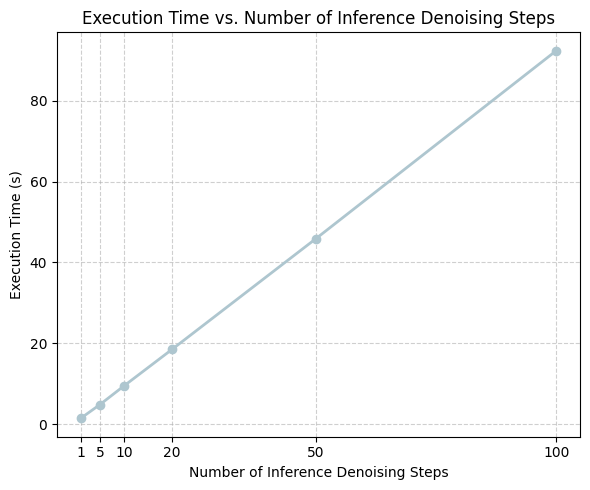

In [2]:
import matplotlib.pyplot as plt

# Data
steps = [1, 5, 10, 20, 50, 100]
execution_time = [1.41, 4.81, 9.43, 18.47, 45.93, 92.44]

# Plot
plt.figure(figsize=(6, 5))
plt.plot(steps, execution_time, marker='o', color='#AEC6CF', linewidth=2)  # pastel blue
plt.title('Execution Time vs. Number of Inference Denoising Steps')
plt.xlabel('Number of Inference Denoising Steps')
plt.ylabel('Execution Time (s)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(steps)
plt.tight_layout()
plt.show()


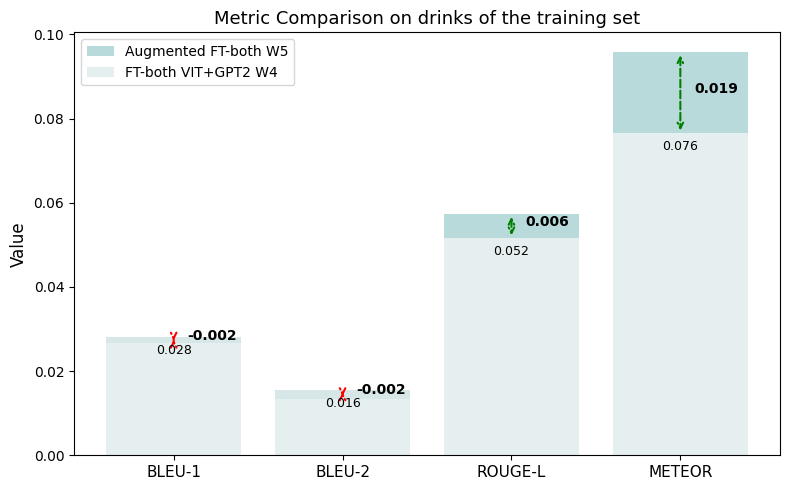

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `df` is your actual DataFrame
# Extract the last non-NaN value for each metric
initial_values = pd.Series({'BLEU-1': 0.0281, 'BLEU-2': 0.0156, 'ROUGE-L': 0.0516, 'METEOR': 0.0765})  

# Final values
final_values = pd.Series({'BLEU-1': 0.0266, 'BLEU-2': 0.0134, 'ROUGE-L': 0.0573, 'METEOR': 0.0957})

# Calculate increase
increase = final_values - initial_values

# Define pastel colors for the bars
initial_color = "#DFEBEB"   # Soft pastel blue
increase_color = "#A8D1D1"  # Soft pastel tone for change

# Create bar plot
fig, ax = plt.subplots(figsize=(8, 5))
x_labels = ['BLEU-1', 'BLEU-2', 'ROUGE-L', 'METEOR']
x = range(len(x_labels))

# Plot increase bars
ax.bar(x, increase.values, bottom=initial_values.values, label="Augmented FT-both W5", alpha=0.8, color=increase_color)

# Plot initial values bars
ax.bar(x, initial_values.values, label="FT-both VIT+GPT2 W4", alpha=0.8, color=initial_color)

# Add arrows and text
for i, (init, inc) in enumerate(zip(initial_values.values, increase.values)):
    final = init + inc
    mid = (init + final) / 2  # Midpoint for arrow text
    improved = inc > 0

    # Arrow color: green if improved, red if worse
    arrow_color = 'green' if improved else 'red'

    # Draw the arrow
    ax.annotate("", xy=(i, init), xycoords='data',
                xytext=(i, final), textcoords='data',
                arrowprops=dict(arrowstyle='<->', linestyle='dashed', color=arrow_color, lw=1.5))

    # Text format
    text = f'{inc:.3f}' if improved else f'-{abs(inc):.3f}'
    
    # Add annotation text
    ax.annotate(text, 
                xy=(i, mid), xycoords='data',  
                xytext=(10, 0), textcoords='offset points',
                ha='left', fontsize=10, fontweight='bold', color='black')

# Add values below the bars of initial_values
for i, value in enumerate(initial_values.values):
    if value != 0:
        ax.annotate(f'{value:.3f}', 
                    xy=(i, value),
                    xytext=(0, -5),
                    textcoords='offset points',
                    ha='center',
                    va='top',
                    fontsize=9,
                    color='black')

# Labels and legend
ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=11)
ax.set_ylabel("Value", fontsize=12)
ax.set_title("Metric Comparison on drinks of the training set", fontsize=13)
ax.legend()

plt.tight_layout()
plt.show()



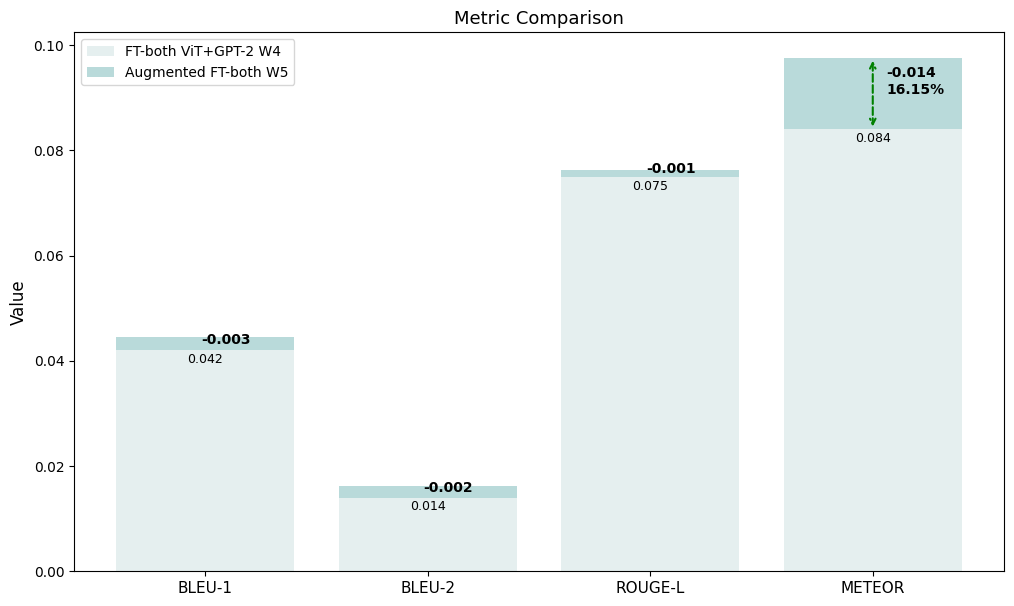

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `df` is your actual DataFrame
w4_results = pd.Series({'BLEU-1': 0.042, 'BLEU-2': 0.014, 'ROUGE-L': 0.075, 'METEOR': 0.084})  

# Initial values
w5_results = pd.Series({'BLEU-1': 0.04451, 'BLEU-2': 0.01614, 'ROUGE-L': 0.07627, 'METEOR': 0.09757})

# Calculate increase
final_values = w5_results
initial_values = w4_results

increase = final_values - initial_values

# Define pastel colors for the bars
initial_color = "#DFEBEB"  # Soft pastel blue
increase_color = "#A8D1D1"  # Soft pastel red for the increase

# Create bar plot
fig, ax = plt.subplots(figsize=(12, 7))
x_labels = ['BLEU-1', 'BLEU-2', 'ROUGE-L', 'METEOR']
x = range(len(x_labels))

# Plot initial values in one pastel color
ax.bar(x, initial_values.values, label="FT-both ViT+GPT-2 W4", alpha=0.8, color=initial_color)

# Plot increase in a different pastel color
ax.bar(x, increase.values, bottom=initial_values.values, label="Augmented FT-both W5", alpha=0.8, color=increase_color)

# Add <--> dashed arrows and text
for i, (init, inc) in enumerate(zip(initial_values.values, increase.values)):
    plot_arrow = inc < 0.005 # Condition to skip the arrow if the increase is too small
    final = init + inc
    mid = (init + final) / 2  # Midpoint for better alignment
    
    # Text next to the arrow
    ax.annotate(f'-{inc:.3f}' + ("" if plot_arrow else f"\n{100*inc/init:.2f}%"), 
                xy=(i, mid), xycoords='data',  
                xytext=(10 if not plot_arrow else -3, 0), textcoords='offset points',  # Shift text slightly to the right
                ha='left', fontsize=10, fontweight='bold', color='black')

    if plot_arrow:
        continue
    # Dashed double-headed arrow <-->
    ax.annotate("", xy=(i, init), xycoords='data',
                xytext=(i, final), textcoords='data',
                arrowprops=dict(arrowstyle='<->', linestyle='dashed', color='green', lw=1.5))
    
    # Añadir valores justo debajo de las barras de initial_values
for i, value in enumerate(initial_values.values):
    # Solo agregar anotación si el valor no es cero
    if value != 0:
        ax.annotate(f'{value:.3f}', 
                    xy=(i, value),  # Posición en la altura exacta de la barra
                    xytext=(0, -2),  # Desplazamiento hacia abajo
                    textcoords='offset points',
                    ha='center',  # Centrado horizontalmente
                    va='top',  # Alineado superiormente
                    fontsize=9,
                    color='black')


# Labels and legend
ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=11)
ax.set_ylabel("Value", fontsize=12)
ax.set_title("Metric Comparison", fontsize=13)
ax.legend()

plt.show()


In [3]:

metrics_data_path = "/projects/master/c5/mcv-c5-group-3/week5/metrics_data.csv"
metrics_df = pd.read_csv(metrics_data_path)
# Remove the prefix "AUGMENTED_TRAINING_fine-tune-both_rw1v37nv - " from column names
metrics_df.columns = metrics_df.columns.str.replace("AUGMENTED_TRAINING_fine-tune-both_rw1v37nv - ", "", regex=False)
# Remove all columns that contain "MIN" or "MAX" in their names
metrics_df = metrics_df.loc[:, ~metrics_df.columns.str.contains("MIN|MAX")]
metrics_df.columns = ["epoch", "step", "ROUGE-L", "BLEU-1", "BLEU-2", "METEOR"]

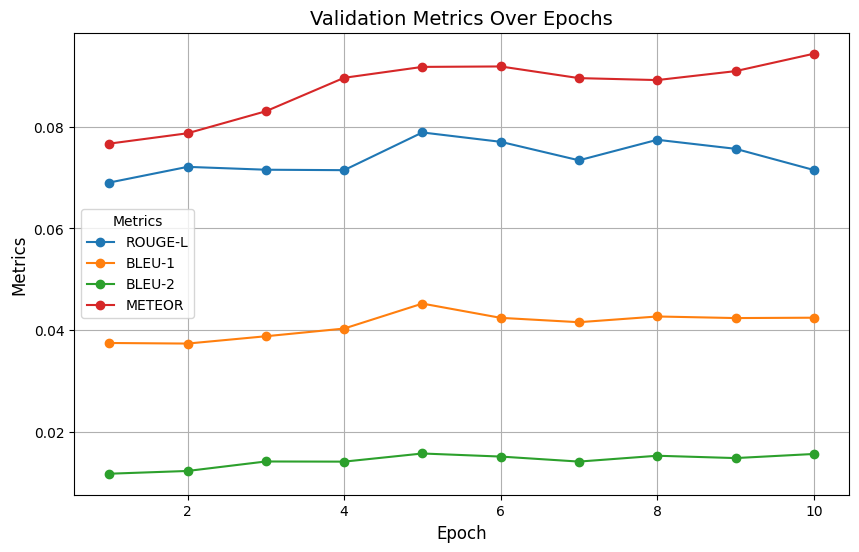

In [4]:
# Plot the metrics over epochs
metrics_df.plot(x='epoch',
                y=['ROUGE-L', 'BLEU-1', 'BLEU-2', 'METEOR'],
                kind='line',
                figsize=(10, 6),
                marker='o')

# Add labels and title
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Metrics', fontsize=12)
plt.title('Validation Metrics Over Epochs', fontsize=14)
plt.legend(title='Metrics', fontsize=10)
plt.grid(True)
plt.show()

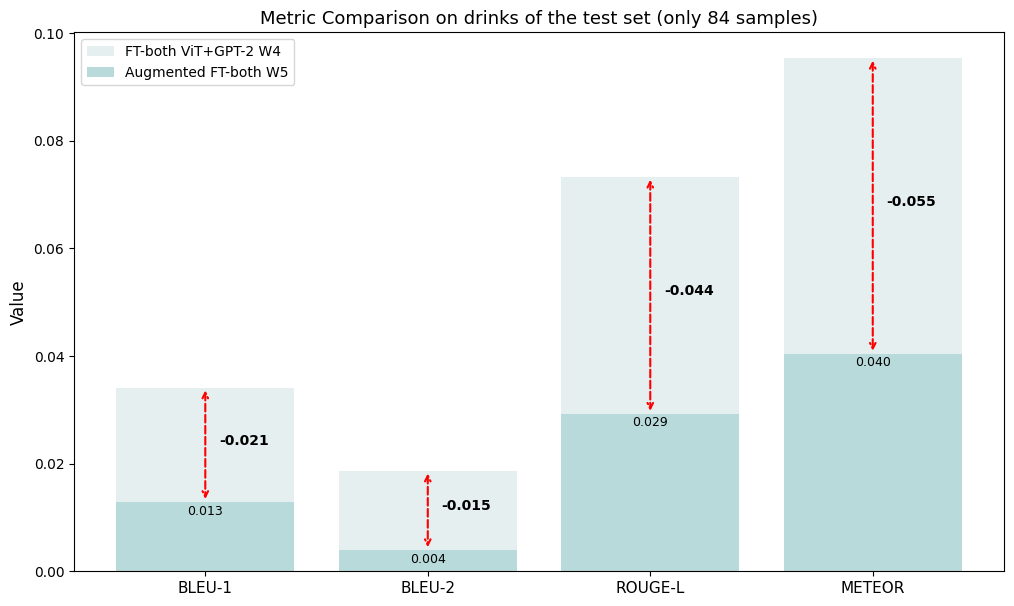

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd


w4_metrics_only_drinks = pd.Series({"BLEU-1": 0.03412, "BLEU-2": 0.01868, "ROUGE-L": 0.07328, "METEOR": 0.09538})
w5_metrics_only_drinks = pd.Series({"BLEU-1": 0.01291, "BLEU-2": 0.003957, "ROUGE-L": 0.02930, "METEOR":0.04044097958509402})

initial_values = w5_metrics_only_drinks

# Initial values
final_values = w4_metrics_only_drinks

# Calculate increase
increase = final_values - initial_values

# Define pastel colors for the bars
initial_color = "#A8D1D1"  # Soft pastel blue
increase_color = "#DFEBEB"  # Soft pastel red for the increase

# Create bar plot
fig, ax = plt.subplots(figsize=(12, 7))
x_labels = ['BLEU-1', 'BLEU-2', 'ROUGE-L', 'METEOR']
x = range(len(x_labels))

# Plot increase in a different pastel color
ax.bar(x, increase.values, bottom=initial_values.values, label="FT-both ViT+GPT-2 W4", alpha=0.8, color=increase_color)

# Plot initial values in one pastel color
ax.bar(x, initial_values.values, label="Augmented FT-both W5", alpha=0.8, color=initial_color)

# Add <--> dashed arrows and text
for i, (init, inc) in enumerate(zip(initial_values.values, increase.values)):
    final = init + inc
    mid = (init + final) / 2  # Midpoint for better alignment
    
    # Dashed double-headed arrow <-->
    ax.annotate("", xy=(i, init), xycoords='data',
                xytext=(i, final), textcoords='data',
                arrowprops=dict(arrowstyle='<->', linestyle='dashed', color='red', lw=1.5))
    
    # Text next to the arrow
    ax.annotate(f'-{inc:.3f}', 
                xy=(i, mid), xycoords='data',  
                xytext=(10, 0), textcoords='offset points',  # Shift text slightly to the right
                ha='left', fontsize=10, fontweight='bold', color='black')

# Añadir valores justo debajo de las barras de initial_values
for i, value in enumerate(initial_values.values):
    # Solo agregar anotación si el valor no es cero
    if value != 0:
        ax.annotate(f'{value:.3f}', 
                    xy=(i, value),  # Posición en la altura exacta de la barra
                    xytext=(0, -2),  # Desplazamiento hacia abajo
                    textcoords='offset points',
                    ha='center',  # Centrado horizontalmente
                    va='top',  # Alineado superiormente
                    fontsize=9,
                    color='black')

# Labels and legend
ax.set_xticks(x)
ax.set_xticklabels(x_labels, fontsize=11)
ax.set_ylabel("Value", fontsize=12)
ax.set_title("Metric Comparison on drinks of the test set (only 84 samples)", fontsize=13)
ax.legend()

plt.show()


In [13]:
loss_data_path = "/projects/master/c5/mcv-c5-group-3/week5/losses_data.csv"
loss_df = pd.read_csv(loss_data_path)
loss_df.columns = loss_df.columns.str.replace("AUGMENTED_TRAINING_fine-tune-both_rw1v37nv - ", "", regex=False)
# Remove all columns that contain "MIN" or "MAX" in their names
loss_df = loss_df.loc[:, ~loss_df.columns.str.contains("MIN|MAX")]
loss_df.columns = ["Epoch", "Validation loss", "Train loss"]

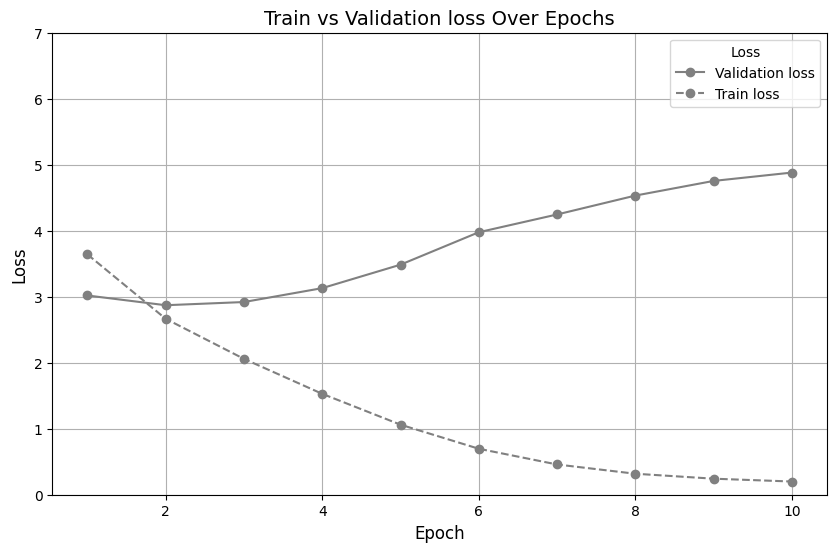

In [14]:
loss_df.plot(x='Epoch',
             y='Validation loss', 
             kind='line', 
             figsize=(10, 6), 
             marker='o', 
             color='gray', 
             linestyle='-')  # Solid line for Validation loss

loss_df.plot(x='Epoch',
             y='Train loss', 
             kind='line', 
             figsize=(10, 6), 
             marker='o', 
             color='gray', 
             linestyle='--',  # Dashed line for Train loss
             ax=plt.gca())  # Use the same axes

plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.title('Train vs Validation loss Over Epochs', fontsize=14)
plt.legend(title='Loss', fontsize=10)
plt.grid(True)
plt.ylim(0, 7)  # Set y-axis limits to 0-7
plt.show()